# Data Cleaning & EDA

## Summary
- Dropping duplicates 
- Filling in missing values 
- Observing the distribution of the length of posts 
- Concatenating both data frames into one 

In [1]:
import pandas as pd
import numpy as np
import seaborn as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
ghost = pd.read_csv('../data/Ghoststories.csv')

In [3]:
funny = pd.read_csv('../data/funnystories.csv')

In [4]:
funny.shape

(10955, 4)

In [5]:
ghost.shape

(10985, 4)

- Because of Reddit's new API a lot of our web scraping will pull duplicates. 
- We want to make sure all of our data points are unique.

In [6]:
funny.drop_duplicates(subset=['text'], inplace=True)

In [7]:
funny.shape

(939, 4)

In [8]:
ghost.drop_duplicates(subset=['text'], inplace=True)

In [9]:
ghost.shape

(1043, 4)

In [10]:
ghost.isnull().sum()

title        0
text         1
subreddit    0
name         0
dtype: int64

In [11]:
funny.isnull().sum()

title        0
text         1
subreddit    0
name         0
dtype: int64

- We can see two missing posts from our data.
- We will fill these in with an empty string because later we will combine our title column with our text column.

In [12]:
ghost['text'] = ghost['text'].fillna('')

funny['text'] = funny['text'].fillna('')

In [13]:
ghost.isnull().sum()

title        0
text         0
subreddit    0
name         0
dtype: int64

In [14]:
funny.isnull().sum()

title        0
text         0
subreddit    0
name         0
dtype: int64

## Observing distribution of word and length count 

In [15]:
funny['text_length'] = [len(i) for i in funny['text']]

In [16]:
ghost['text_length'] = [len(i) for i in ghost['text']]

In [17]:
ghost['text_word_length'] = [len(i.split(' ')) for i in ghost['text']]
funny['text_word_length'] = [len(i.split(' ')) for i in funny['text']]

In [18]:
ghost.head()

,title,text,subreddit,name,text_length,text_word_length
0,Have you ever walked into something invisible?,"Ok I know how this sounds, but this is a serio...",Ghoststories,t3_15h9d7e,1122,216
1,Weird church ghost story,This happened when I was 17. My youth group wa...,Ghoststories,t3_15grqd2,1989,392
2,Random walking noise in my house,I don’t know what it was but I went to the bat...,Ghoststories,t3_15gyzsf,594,114
3,I grew up in a haunted house,"Hi there, I grew up in what would be considere...",Ghoststories,t3_15gqfk0,1578,288
4,White light coming out of the wall,"A couple days ago, I woke up in the middle of ...",Ghoststories,t3_15grqz4,815,168


In [19]:
funny.head()

,title,text,subreddit,name,text_length,text_word_length
0,My Mother's Russian Neighbour,So this story isn't mine but my mother's from ...,funnystories,t3_15ga20a,647,117
1,Im a weird virgin...,Ok so I (17f) am still a virgin. I never had a...,funnystories,t3_15fsclg,935,195
2,Worst first day ever,,funnystories,t3_15f1le0,0,1
3,FUNNY STORY,I WENT TO A FANCY RESTAURANT AFTER CHURCH WITH...,funnystories,t3_15er04c,193,37
4,Arcade poo,"As crazy as this sounds, this is a real story!...",funnystories,t3_15c4bg1,1600,334


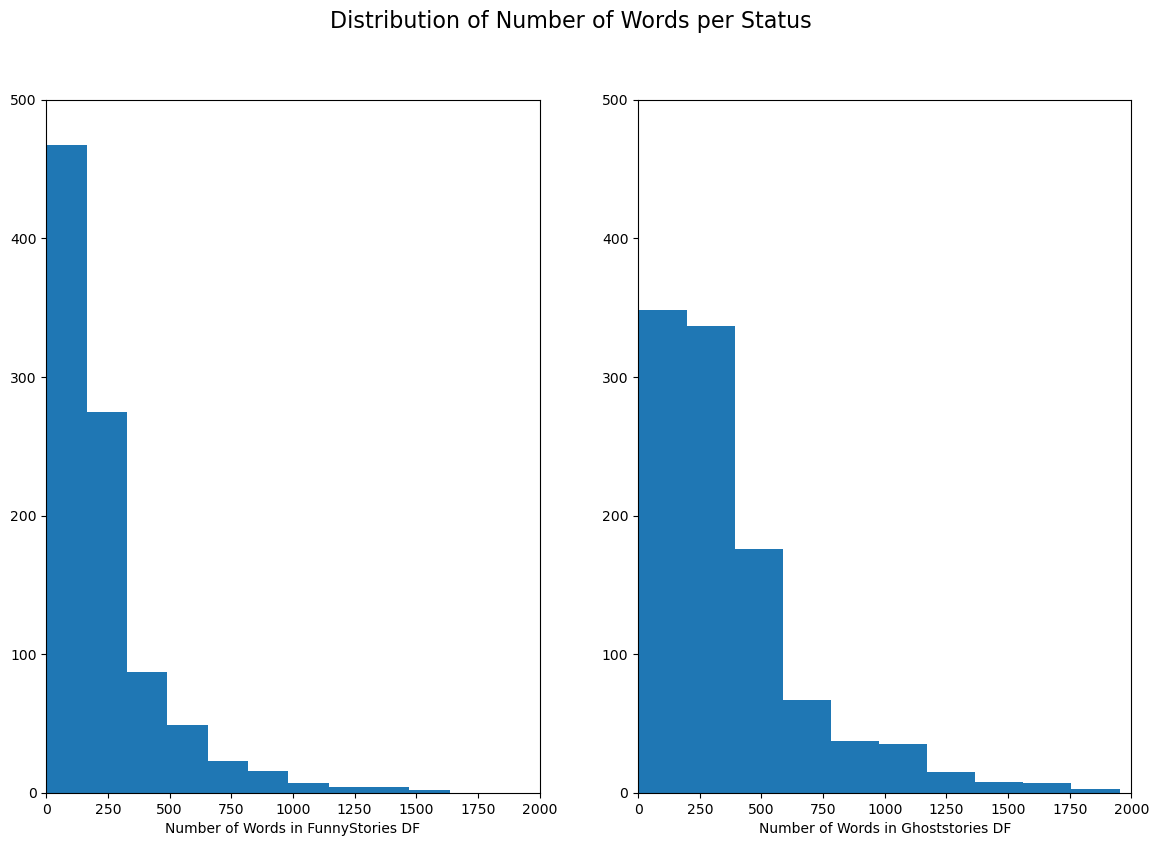

In [20]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,9))
fig.suptitle('Distribution of Number of Words per Status', fontsize=16)
xmax = 2000
ymax = 500
ax0.set_xlim(0, xmax)
ax0.set_ylim(0, ymax)
ax1.set_xlim(0, xmax)
ax1.set_ylim(0, ymax)

ax0.hist(funny['text_word_length'][funny['text_word_length'] < 2000])
ax0.set_xlabel('Number of Words in FunnyStories DF', fontsize=10)

ax1.hist(ghost['text_word_length'][ghost['text_word_length'] < 2000])
ax1.set_xlabel('Number of Words in Ghoststories DF', fontsize=10);


- We can see the Ghoststories subreddit has a higher proportion of longer stories. Considering I have a slightly higher amount of Ghoststories in my data, knowing that this subreddit also contains higher word counts tells me I will want to filter out a larger amount of common words between the two. 

## Combining our title and text columns will fill in any missing values for text. 

In [21]:
funny['title_text'] = funny['title'] + funny['text']

In [22]:
ghost['title_text'] = ghost['title'] + ghost['text']

- Our summary statistics confirm to us that Ghoststories are longer and on average have roughly 130 more words than in the funny stories subreddit. 

In [23]:
ghost.describe()

,text_length,text_word_length
count,1043.000000,1043.000000
mean,2015.803452,386.348035
std,2150.286960,400.595960
min,0.000000,1.000000
25%,701.000000,139.000000
50%,1466.000000,288.000000
75%,2547.500000,494.500000
max,25982.000000,4365.000000


In [24]:
funny.describe()

,text_length,text_word_length
count,939.000000,939.000000
mean,1342.048988,256.669862
std,1977.503752,369.077187
min,0.000000,1.000000
25%,485.000000,94.000000
50%,859.000000,165.000000
75%,1521.500000,287.000000
max,33441.000000,5802.000000


In [25]:
ghost.shape

(1043, 7)

In [26]:
funny.shape

(939, 7)

In [27]:
both_subs = pd.concat([funny, ghost], axis = 0, ignore_index=True)

In [28]:
both_subs.shape

(1982, 7)

In [29]:
both_subs['subreddit'] = both_subs['subreddit'].map({'funnystories': 0, 'Ghoststories': 1})

In [30]:
both_subs.isnull().sum()

title               0
text                0
subreddit           2
name                0
text_length         0
text_word_length    0
title_text          0
dtype: int64

- We have two missing subreddits because everytime we pull new data, a single row is generated with the title column names as its values. These rows have no information on them leaving it easy to remove from our dataset. 

In [31]:
both_subs.dropna(axis=0, inplace=True)

In [32]:
both_subs.isnull().sum()

title               0
text                0
subreddit           0
name                0
text_length         0
text_word_length    0
title_text          0
dtype: int64

In [33]:
both_subs.shape

(1980, 7)

In [34]:
both_subs.to_csv('../data/both_subreddits.csv', index=False)

## Checking to see if stop_words contain any value.
- None of these words are unique or will have any impact on my data. This tells me my base iteration should include removing stop_words. 

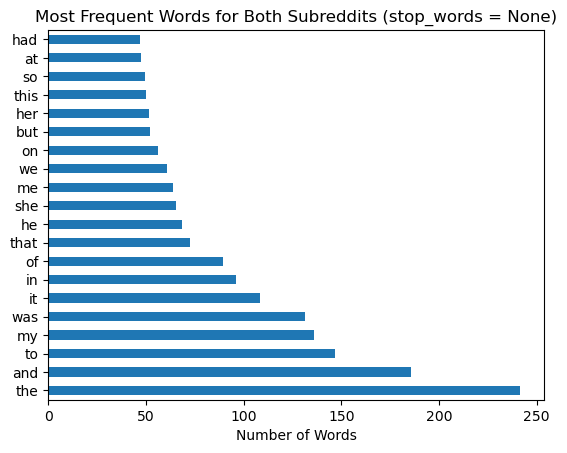

In [40]:
X = both_subs['title_text']
y = both_subs['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
tfid = TfidfVectorizer(stop_words=None, ngram_range=(1, 1))
tfid.fit(X_train)
X_1 = tfid.transform(X_train)
X_1_df = pd.DataFrame(X_1.todense(), 
                      columns=tfid.get_feature_names_out())
X_1_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')
plt.title('Most Frequent Words for Both Subreddits (stop_words = None)')
plt.xlabel('Number of Words');
plt.savefig('../images/top_w_stop_w_none.png')